# Data Prep & Data Analysis

### Question 1: Web Scrapping

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States"

In [3]:
response = requests.get(url)

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
presidents_table = soup.find('table', class_='wikitable')

In [6]:
titles =presidents_table.find_all('th')[:7]

In [7]:
numbers = presidents_table.find_all('th')[7:]
number = [ numb.text.strip() for numb in numbers ]

In [8]:
tit = [ title.text.strip() for title in titles ]

In [9]:
column_data = presidents_table.find_all('tr')

In [10]:
images = presidents_table.find_all('img')

In [11]:
image_urls = [img['src'] for img in images]

In [12]:
dates = []
names = []
vices = []
elect = []
part = []

In [13]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row = [data.text.strip() for data in row_data]
    dates.append(individual_row[2])
    names.append(individual_row[1])
    vices.append(individual_row[6])
    elect.append(individual_row[5])
    part.append(individual_row[4])

In [14]:
data = {tit[0]: number, tit[1]: image_urls, tit[2]: names, tit[3]: dates, tit[4]:part,tit[5]:elect, tit[6]:vices }

In [15]:
presidents_df = pd.DataFrame(data)

In [16]:
presidents_df

,No.[a],Portrait,Name(Birth–Death),Term[14],Party[b][15],Election,Vice President[16]
0,1,//upload.wikimedia.org/wikipedia/commons/thumb...,George Washington(1732–1799)[17],"April 30, 1789–March 4, 1797",Unaffiliated,1788–1789\n\n1792,John Adams[c]
1,2,//upload.wikimedia.org/wikipedia/commons/thumb...,John Adams(1735–1826)[19],"March 4, 1797–March 4, 1801",Federalist,1796,Thomas Jefferson[d]
2,3,//upload.wikimedia.org/wikipedia/commons/thumb...,Thomas Jefferson(1743–1826)[21],"March 4, 1801–March 4, 1809",Democratic-Republican,1800\n\n1804,Aaron Burr\n\nGeorge Clinton
3,4,//upload.wikimedia.org/wikipedia/commons/thumb...,James Madison(1751–1836)[22],"March 4, 1809–March 4, 1817",Democratic-Republican,1808\n\n1812,"George Clinton[e]\n\nVacant afterApril 20, 181..."
4,5,//upload.wikimedia.org/wikipedia/commons/thumb...,James Monroe(1758–1831)[24],"March 4, 1817–March 4, 1825",Democratic-Republican,1816\n\n1820,Daniel D. Tompkins
5,6,//upload.wikimedia.org/wikipedia/commons/thumb...,John Quincy Adams(1767–1848)[25],"March 4, 1825–March 4, 1829",Democratic-Republican[f]\n\nNational Republican,1824,John C. Calhoun[g]
6,7,//upload.wikimedia.org/wikipedia/commons/thumb...,Andrew Jackson(1767–1845)[28],"March 4, 1829–March 4, 1837",Democratic,1828\n\n1832,"John C. Calhoun[h]\n\nVacant afterDecember 28,..."
7,8,//upload.wikimedia.org/wikipedia/commons/thumb...,Martin Van Buren(1782–1862)[29],"March 4, 1837–March 4, 1841",Democratic,1836,Richard Mentor Johnson
8,9,//upload.wikimedia.org/wikipedia/commons/thumb...,William Henry Harrison(1773–1841)[30],"March 4, 1841–April 4, 1841[e]",Whig,1840,John Tyler
9,10,//upload.wikimedia.org/wikipedia/commons/thumb...,John Tyler(1790–1862)[31],"April 4, 1841[i]–March 4, 1845",Whig[j]\n\nUnaffiliated,–,Vacant throughoutpresidency


### Question 2: Number of Presidents

In [17]:
num_presidents = set()

In [18]:
for i in (presidents_df['Name(Birth–Death)']):
    num_presidents.add(i)

In [19]:
number = len(num_presidents)

In [20]:
print('The number of presidents are:',number)

The number of presidents are: 45


### Question 3: Number of Presidencies

In [21]:
num_presidencies = presidents_df.shape[0]

In [22]:
print("Number of presidencies:", num_presidencies)

Number of presidencies: 46


### Question 4: Presidents Who Served More Than One Term With One Vice

In [23]:
excellent_presidents = []

In [24]:
def clean_date(date_str):
    return date_str.split('[')[0]

In [25]:
durations = []

In [26]:
for term in presidents_df.loc[:,'Term[14]']:
    start, end = term.split('–')
    start_date = datetime.strptime(clean_date(start), "%B %d, %Y")
    if end == "Incumbent":
        end_date = datetime.now()
    else:
        end_date = datetime.strptime(clean_date(end), "%B %d, %Y")
    duration = (end_date - start_date).days
    durations.append((term, duration))

In [27]:
for i, (term, duration) in enumerate(durations):
    if (duration) > (1461):  # More than four years
        current_vice = presidents_df['Vice President[16]'].tolist()[i].split('\n\n')
        if len(current_vice) > 0 and len(current_vice) < 3 and current_vice[0].startswith('Vacant'):
            current_vice.remove(current_vice[0])
        if len(current_vice) == 1:
                excellent_presidents.append((presidents_df['Name(Birth–Death)'].tolist()[i], current_vice[0], duration))

In [84]:
print("The presidents with one Vice President throughout their many terms are:")
for president, vice_president, durat in excellent_presidents:
    print(president, 'whose vice was', vice_president, 'throughout his', round(durat/365), 'years.')

The presidents with one Vice President throughout their many terms are:
George Washington(1732–1799)[17] whose vice was John Adams[c] throughout his 8 years.
James Monroe(1758–1831)[24] whose vice was Daniel D. Tompkins throughout his 8 years.
Theodore Roosevelt(1858–1919)[51] whose vice was Charles W. Fairbanks throughout his 7 years.
Woodrow Wilson(1856–1924)[54] whose vice was Thomas R. Marshall throughout his 8 years.
Calvin Coolidge(1872–1933)[56] whose vice was Charles G. Dawes throughout his 6 years.
Harry S. Truman(1884–1972)[60] whose vice was Alben W. Barkley throughout his 8 years.
Dwight D. Eisenhower(1890–1969)[62] whose vice was Richard Nixon throughout his 8 years.
Lyndon B. Johnson(1908–1973)[64] whose vice was Hubert Humphrey throughout his 5 years.
Ronald Reagan(1911–2004)[69] whose vice was George H. W. Bush throughout his 8 years.
Bill Clinton(b. 1946)[71] whose vice was Al Gore throughout his 8 years.
George W. Bush(b. 1946)[72] whose vice was Dick Cheney throughou

### Question 5: President Who Was In Office Longest

In [29]:
took_office = []
left_office = []
took_office_years = []
left_office_years = []

In [30]:
for i in presidents_df.loc[:,'Term[14]']:
    list = i.split("–")
    took_office.append(list[0])
    took_office_years.append(list[0].replace('[a]','').replace('[b]','').replace('[c]','').replace('[d]','').replace('[e]','').replace('[f]','').replace('[g]','').replace('[h]','').replace('[p]','').replace('[o]','').replace('[n]','').replace('[m]','').replace('[l]','').replace('[k]','').replace('[j]','').replace('[i]','').replace('[x]','').replace('[w]','').replace('[v]','').replace('[u]','').replace('[t]','').replace('[s]','').replace('[r]','').replace('[q]','').split(',')[-1])
    left_office_years.append(list[-1].replace('[a]','').replace('[b]','').replace('[c]','').replace('[d]','').replace('[e]','').replace('[f]','').replace('[g]','').replace('[h]','').replace('[p]','').replace('[o]','').replace('[n]','').replace('[m]','').replace('[l]','').replace('[k]','').replace('[j]','').replace('[i]','').replace('[x]','').replace('[w]','').replace('[v]','').replace('[u]','').replace('[t]','').replace('[s]','').replace('[r]','').replace('[q]','').split(',')[-1])
    left_office.append(list[1])

In [31]:
longest_term_index = max(range(len(durations)), key=lambda i: durations[i][1])
longest_term = durations[longest_term_index]
number_of_terms = round((longest_term[-1]/365)/4)
times_in_office = []

In [32]:
year_Term = 0
for i in range(number_of_terms):
    times_in_office.append(int(took_office[longest_term_index].split(',')[-1]) + year_Term)
    year_Term += 4

In [33]:
print("The longest presidential term was from "
      f"{presidents_df.loc[:,'Name(Birth–Death)'][longest_term_index]}, and the date he took office was {took_office[longest_term_index]}, lasting {number_of_terms} terms. The times he went in office are {times_in_office}")


The longest presidential term was from Franklin D. Roosevelt(1882–1945)[59], and the date he took office was March 4, 1933, lasting 3 terms. The times he went in office are [1933, 1937, 1941]


### Question 6: Presidents Who Served As Vices First

In [34]:
names3 = []
dates3 = []

In [35]:
for president in presidents_df['Name(Birth–Death)']:
    name_start = president.find('(')
    name_end = president.find(')')
    date_start = president.find('(') + 1
    date_end = president.find(')')
    name = president[:name_start]
    date = president[date_start:date_end]
    names3.append(name)
    dates3.append(date)

In [36]:
grouped_vices = []

In [37]:
for i in range(len(presidents_df.loc[:,'Vice President[16]'])):
    presidents_df.loc[:,'Vice President[16]'][i] = presidents_df.loc[:,'Vice President[16]'][i].replace('[a]','').replace('[b]','').replace('[c]','').replace('[d]','').replace('[e]','').replace('[f]','').replace('[g]','').replace('[h]','').replace('[i]','').replace('[j]','').replace('[k]','').replace('[l]','').replace('[m]','').replace('[n]','').replace('[o]','').replace('[t]','')
    if '\n\n' in presidents_df.loc[:,'Vice President[16]'][i]:
        grouped_vices.append(presidents_df.loc[:,'Vice President[16]'][i].split('\n\n'))
    else:
        grouped_vices.append([presidents_df.loc[:,'Vice President[16]'][i]])

In [38]:
pres_vice = []
indices= []
pres_vice_terms = []
pres_term = []

In [39]:
for i, sublist in enumerate(grouped_vices):
    for name in names3:
        if name in sublist or '\n'+name in sublist:
            pres_vice.append(name)
            indices.append(i)

In [40]:
for i in range(len(indices)):
    pres_vice_terms.append(dates[indices[i]])

In [41]:
for i, name in enumerate( names3):
    if name in pres_vice:
        pres_term.append(presidents_df.loc[:,'Term[14]'].tolist()[i])

In [42]:
print('The presidents who served as vices first are')
for i in range(len(pres_vice)):
    print(pres_vice[i] + '. Term as vice :'+ pres_vice_terms[i], '. Term as President: ', pres_term[i])

The presidents who served as vices first are
John Adams. Term as vice :April 30, 1789–March 4, 1797 . Term as President:  March 4, 1797–March 4, 1801
Thomas Jefferson. Term as vice :March 4, 1797–March 4, 1801 . Term as President:  March 4, 1801–March 4, 1809
Martin Van Buren. Term as vice :March 4, 1829–March 4, 1837 . Term as President:  March 4, 1837–March 4, 1841
John Tyler. Term as vice :March 4, 1841–April 4, 1841[e] . Term as President:  April 4, 1841[i]–March 4, 1845
Millard Fillmore. Term as vice :March 4, 1849–July 9, 1850[e] . Term as President:  July 9, 1850[k]–March 4, 1853
Andrew Johnson. Term as vice :March 4, 1861–April 15, 1865[e] . Term as President:  April 15, 1865[m]–March 4, 1869
Chester A. Arthur. Term as vice :March 4, 1881–September 19, 1881[e] . Term as President:  September 19, 1881[o]–March 4, 1885
Theodore Roosevelt. Term as vice :March 4, 1897–September 14, 1901[e] . Term as President:  September 14, 1901[p]–March 4, 1909
Calvin Coolidge. Term as vice :Marc

### Question 7: Presidents Who Were **Never** Elected

In [43]:
count = 0

In [44]:
presidents_never_elect = []

In [45]:
for i, year in enumerate(presidents_df.loc[:,'Election']):
    if year == '–':
        count+=1
        presidents_never_elect.append(presidents_df.loc[:,'Name(Birth–Death)'][i])

In [46]:
print(count, 'presidents were never elected. And they are: ')
for i in presidents_never_elect:
    print(i)

5 presidents were never elected. And they are: 
John Tyler(1790–1862)[31]
Millard Fillmore(1800–1874)[36]
Andrew Johnson(1808–1875)[42]
Chester A. Arthur(1829–1886)[46]
Gerald Ford(1913–2006)[67]


### Question 8: Presidents Who Have The Same Fore And Last Names 

In [47]:
first_names = [name.split()[0] for name in names3]
last_names = [name.split()[-1] for name in names3]

In [48]:
first_name_counts = {}

In [49]:
for name in first_names:
    if name in first_name_counts:
        first_name_counts[name] += 1
    else:
        first_name_counts[name] = 1

In [50]:
same_first_names = []

In [51]:
for name, count in first_name_counts.items():
    if count > 1:
        same_first_names.append(name)

In [52]:
last_name_counts = {}

In [53]:
for name in last_names:
    if name in last_name_counts:
        last_name_counts[name] += 1
    else:
        last_name_counts[name] = 1

In [54]:
same_last_names = []

In [55]:
for name, count in last_name_counts.items():
    if count > 1:
        same_last_names.append(name)

In [56]:
forenames = []
lastnames= []

In [57]:
for president, term in zip(names3, dates):
    name_parts = president.split()
    first_name = name_parts[0]
    last_name = name_parts[-1]
    if first_name in same_first_names:
        forenames.append((president, term))
    if last_name in same_last_names:
        lastnames.append((president, term))

In [58]:
fore_names_nodup = []
last_names_nodup = []

In [59]:
fore = {}
last = {}

In [60]:
for president, term in forenames:
    if president in fore:
        fore[president] +=1
    else:
        fore[president] = 1

In [61]:
for president, term in lastnames:
    if president in last:
        last[president] +=1
    else:
        last[president] = 1

In [62]:
for president, term in forenames:
    if fore[president] == 1:
        fore_names_nodup.append((president, term))

In [63]:
for president, term in lastnames:
    if last[president] == 1:
        last_names_nodup.append((president, term))

In [64]:
print("The presidents with same first names are: ")
for name, term in fore_names_nodup:
    print(name, 'and the term he served was', term, '.')

The presidents with same first names are: 
George Washington and the term he served was April 30, 1789–March 4, 1797 .
John Adams and the term he served was March 4, 1797–March 4, 1801 .
James Madison and the term he served was March 4, 1809–March 4, 1817 .
James Monroe and the term he served was March 4, 1817–March 4, 1825 .
John Quincy Adams and the term he served was March 4, 1825–March 4, 1829 .
Andrew Jackson and the term he served was March 4, 1829–March 4, 1837 .
William Henry Harrison and the term he served was March 4, 1841–April 4, 1841[e] .
John Tyler and the term he served was April 4, 1841[i]–March 4, 1845 .
James K. Polk and the term he served was March 4, 1845–March 4, 1849 .
Franklin Pierce and the term he served was March 4, 1853–March 4, 1857 .
James Buchanan and the term he served was March 4, 1857–March 4, 1861 .
Andrew Johnson and the term he served was April 15, 1865[m]–March 4, 1869 .
James A. Garfield and the term he served was March 4, 1881–September 19, 1881[e

In [65]:
print("The presidents with same last names are: ")
for name, term in last_names_nodup:
    print(name, 'and the term he served was', term, '.')

The presidents with same last names are: 
John Adams and the term he served was March 4, 1797–March 4, 1801 .
John Quincy Adams and the term he served was March 4, 1825–March 4, 1829 .
William Henry Harrison and the term he served was March 4, 1841–April 4, 1841[e] .
Andrew Johnson and the term he served was April 15, 1865[m]–March 4, 1869 .
Benjamin Harrison and the term he served was March 4, 1889–March 4, 1893 .
Theodore Roosevelt and the term he served was September 14, 1901[p]–March 4, 1909 .
Franklin D. Roosevelt and the term he served was March 4, 1933–April 12, 1945[e] .
Lyndon B. Johnson and the term he served was November 22, 1963[s]–January 20, 1969 .
George H. W. Bush and the term he served was January 20, 1989–January 20, 1993 .
George W. Bush and the term he served was January 20, 2001–January 20, 2009 .


### Question 9: The Oldest President

In [66]:
born = []
dies = []

In [67]:
for i in dates3:
    if '–' in i:
        t = i.split('–')
        born.append(int(t[0]))
        dies.append(int(t[-1]))
    elif '.' in i:
        t = i.split('.')
        born.append(int(t[-1]))
        dies.append(2024)

In [68]:
oldest = float('-inf')

In [69]:
index_high = 0

In [70]:
for i, year in enumerate(born):
    age_at_inauguration = int(took_office_years[i]) - int(born[i])
    if age_at_inauguration > oldest:
        oldest = age_at_inauguration
        index_high = i

In [71]:
print('The name of the oldest president is: ',presidents_df.loc[:,'Name(Birth–Death)'][index_high] ,'and the year he got in office is:', presidents_df.loc[:,'Term[14]'][index_high].split('–')[0].split(',')[-1],'and the year he left office is: ', presidents_df.loc[:,'Term[14]'][index_high].split('–')[-1], 'and the time spent in office is', (durations[index_high])[-1]/365, ' years.' )

The name of the oldest president is:  Joe Biden(b. 1942)[13] and the year he got in office is:   2021 and the year he left office is:  Incumbent and the time spent in office is 3.361643835616438  years.


### Question 10: The Youngest President In Office

In [72]:
youngest = float('inf')

In [73]:
index_low = 0

In [74]:
for i, year in enumerate(born):
    age_at_inauguration = int(took_office_years[i]) - int(born[i])
    if age_at_inauguration < youngest:
        youngest = age_at_inauguration
        index_low = i

In [75]:
print('The name of the youngest president is: ',presidents_df.loc[:,'Name(Birth–Death)'][index_low] ,'and the year he got in office is: ', presidents_df.loc[:,'Term[14]'][index_low].split('–')[0].split(',')[-1],'and the year he left office is:', presidents_df.loc[:,'Term[14]'][index_low].split('–')[-1].split(',')[-1], 'and the time spent in office is', (durations[index_low])[-1]/365, ' years.' )

The name of the youngest president is:  Theodore Roosevelt(1858–1919)[51] and the year he got in office is:   1901[p] and the year he left office is:  1909 and the time spent in office is 7.473972602739726  years.


### Question 11: President Who Lived Longer After Leaving Office

In [76]:
longest_lived_years = 0
index_longest_lived = 0

In [77]:
for i in range(len(presidents_df.loc[:,'Name(Birth–Death)'])):
    if dies[i] != 0 and left_office_years[i] != "Incumbent":
        time_lived_after_office = int(dies[i]) - int(left_office_years[i])
        if time_lived_after_office > longest_lived_years:
            longest_lived_years = time_lived_after_office
            index_longest_lived = i

In [78]:
print('The President who lived the longest after leaving office: ',presidents_df.loc[:,'Name(Birth–Death)'][index_longest_lived] ,'and the time he left office is:', presidents_df.loc[:,'Term[14]'][index_longest_lived].split('–')[-1], 'and the time he left office till his death is', longest_lived_years, 'years.' )

The President who lived the longest after leaving office:  Jimmy Carter(b. 1924)[68] and the time he left office is: January 20, 1981 and the time he left office till his death is 43 years.


### Question 12: A Bar Graph To Show The Number Of Presidents And Their Respective Political Parties

In [79]:
party_counts = {}

In [80]:
for party in presidents_df.loc[:,'Party[b][15]']:
    party_list = party.split('\n\n')
    for i in party_list:
        i = i.replace('[a]','').replace('[b]','').replace('[c]','').replace('[d]','').replace('[e]','').replace('[f]','').replace('[g]','').replace('[h]','').replace('[i]','').replace('[j]','').replace('[k]','').replace('[l]','').replace('[m]','').replace('[n]','').replace('[o]','').replace('[t]','')
        if i in party_counts:
            party_counts[i] += 1
        else:
            party_counts[i] = 1

In [81]:
parties = []
counts = []
for i in party_counts:
    parties.append(i)

In [82]:
for i in party_counts.values():
    counts.append(i)

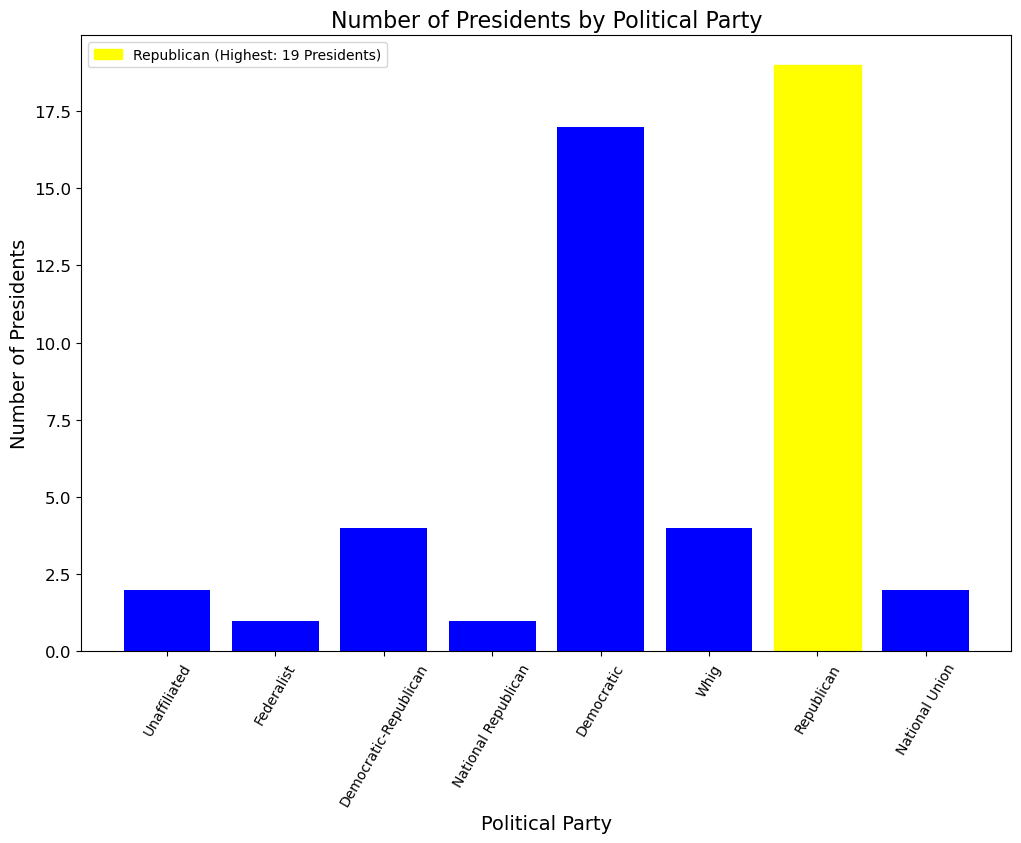

In [83]:
plt.figure(figsize=(12, 8))
bars = plt.bar(parties, counts, color='blue')

most_presidents_party = max(party_counts, key=party_counts.get)
most_presidents_count = party_counts[most_presidents_party]

highest_bar = None
for bar, party in zip(bars, parties):
    if party == most_presidents_party:
        bar.set_color('yellow')
        highest_bar = bar

plt.xlabel('Political Party', fontsize=14)
plt.ylabel('Number of Presidents', fontsize=14)
plt.title('Number of Presidents by Political Party', fontsize=16)
plt.xticks(rotation=60, fontsize=10)
plt.yticks(fontsize=12)

if highest_bar:
    plt.legend([highest_bar], [f"{most_presidents_party} (Highest: {most_presidents_count} Presidents)"], loc='upper left')

plt.show()